### Exploratory Data Analysis

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv("Flight_Price_cleaned_data.csv")
df.head()

,Flight_Date,Airline_Name,Flight_Number,Travel_Class,Origin_City,Departure_Time,Destination_City,Arrival_Time,Flight_Duration,Ticket_Price,Num_Stops,Date_Day,Date_Month,Date_Quarter,Date_Year
0,2023-06-26,4,1416,1,2,190,5,230,16,6013,39,26,6,2,2023
1,2023-06-26,4,1395,1,2,40,5,81,18,6013,39,26,6,2,2023
2,2023-06-26,1,1217,1,2,17,5,56,16,6016,39,26,6,2,2023
3,2023-06-26,7,1567,1,2,88,5,128,17,6015,39,26,6,2,2023
4,2023-06-26,7,1557,1,2,70,5,111,18,6015,39,26,6,2,2023


In [52]:
df.isnull().sum()

Flight_Date         0
Airline_Name        0
Flight_Number       0
Travel_Class        0
Origin_City         0
Departure_Time      0
Destination_City    0
Arrival_Time        0
Flight_Duration     0
Ticket_Price        0
Num_Stops           0
Date_Day            0
Date_Month          0
Date_Quarter        0
Date_Year           0
dtype: int64

In [53]:
df.dtypes

Flight_Date         object
Airline_Name         int64
Flight_Number        int64
Travel_Class         int64
Origin_City          int64
Departure_Time       int64
Destination_City     int64
Arrival_Time         int64
Flight_Duration      int64
Ticket_Price         int64
Num_Stops            int64
Date_Day             int64
Date_Month           int64
Date_Quarter         int64
Date_Year            int64
dtype: object

### Price Distribution

1. Distribution of Flight Prices:

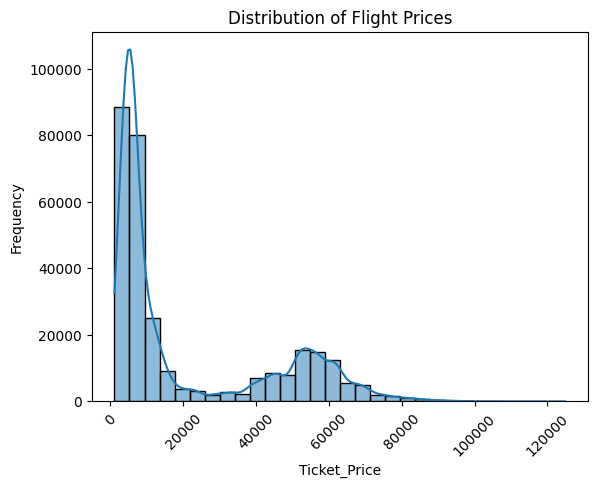

In [55]:
sns.histplot(data=df,x='Ticket_Price',bins=30,kde=True)
plt.title('Distribution of Flight Prices')
plt.xticks(rotation=45)
plt.xlabel('Ticket_Price')
plt.ylabel('Frequency')
plt.show()

2. Prices Across Airlines:

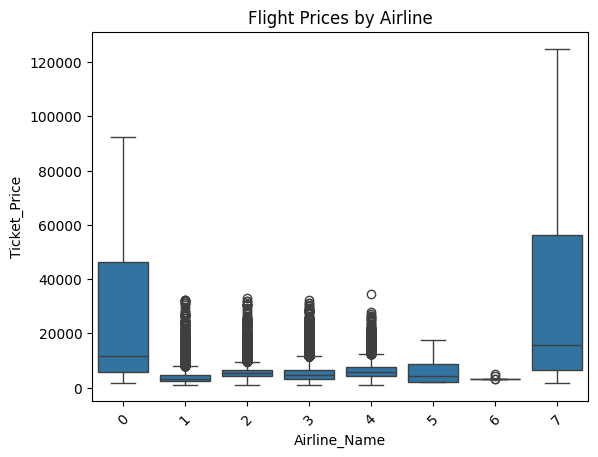

In [56]:
# Boxplot for price distribution by airline
sns.boxplot(data=df, x='Airline_Name', y='Ticket_Price')
plt.title('Flight Prices by Airline')
plt.xticks(rotation=45)
plt.show()


In [57]:
df.columns

Index(['Flight_Date', 'Airline_Name', 'Flight_Number', 'Travel_Class',
       'Origin_City', 'Departure_Time', 'Destination_City', 'Arrival_Time',
       'Flight_Duration', 'Ticket_Price', 'Num_Stops', 'Date_Day',
       'Date_Month', 'Date_Quarter', 'Date_Year'],
      dtype='object')

3. Price Patterns Across Travel Times

In [58]:
df['Departure_Time']=df['Departure_Time'].astype(str)

In [60]:
# Convert 'dep_time' into time-of-day categories
def get_time_category(time_str):
    hour = int(time_str.split(':')[0])  # Extract hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time_Category'] = df['Departure_Time'].apply(get_time_category)
df['Time_Category']


0           Night
1           Night
2         Evening
3           Night
4           Night
           ...   
300256      Night
300257      Night
300258      Night
300259      Night
300260      Night
Name: Time_Category, Length: 300261, dtype: object

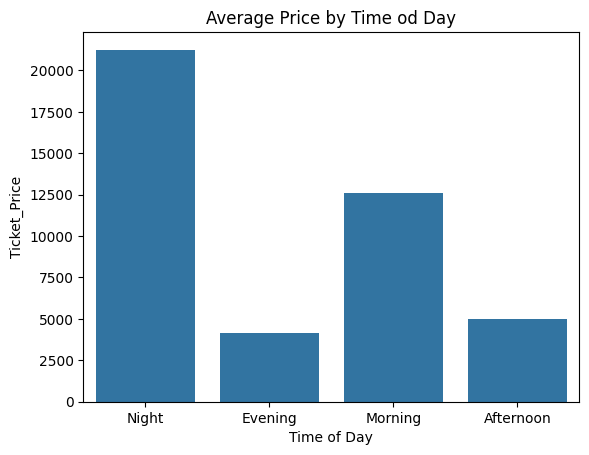

In [62]:
sns.barplot(data=df,x='Time_Category',y='Ticket_Price',estimator='mean',errorbar=None)
plt.title('Average Price by Time od Day')
plt.ylabel('Ticket_Price')
plt.xlabel('Time of Day')
plt.show()

4. Prices Across Routes

In [63]:
df.columns

Index(['Flight_Date', 'Airline_Name', 'Flight_Number', 'Travel_Class',
       'Origin_City', 'Departure_Time', 'Destination_City', 'Arrival_Time',
       'Flight_Duration', 'Ticket_Price', 'Num_Stops', 'Date_Day',
       'Date_Month', 'Date_Quarter', 'Date_Year', 'time_category',
       'Time_Category'],
      dtype='object')

In [64]:
#convert 'from' and 'to' columns to string
df['Origin_City'] = df['Origin_City'].astype(str)
df['Destination_City'] = df['Destination_City'].astype(str)

#Create a new route column for better visualization
df['Route'] = df['Origin_City'] + "->" + df['Destination_City']

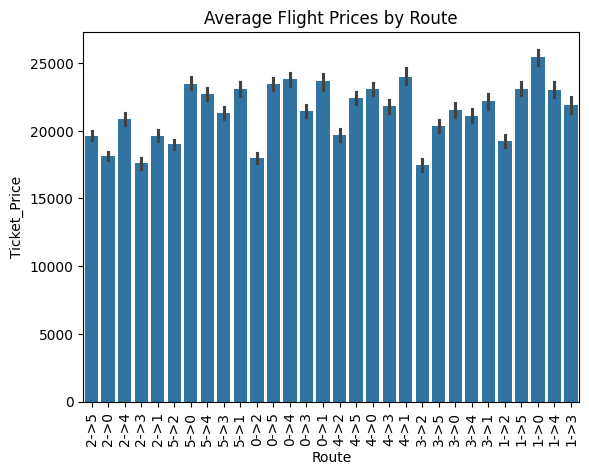

In [65]:
# Plot route price distribution
sns.barplot(data=df, x='Route', y='Ticket_Price')
plt.title('Average Flight Prices by Route')
plt.xticks(rotation=90)
plt.show()


Visualize Relationships:

1. Scatter Plot: Flight Duration vs. Price

In [66]:
df.columns

Index(['Flight_Date', 'Airline_Name', 'Flight_Number', 'Travel_Class',
       'Origin_City', 'Departure_Time', 'Destination_City', 'Arrival_Time',
       'Flight_Duration', 'Ticket_Price', 'Num_Stops', 'Date_Day',
       'Date_Month', 'Date_Quarter', 'Date_Year', 'time_category',
       'Time_Category', 'Route'],
      dtype='object')

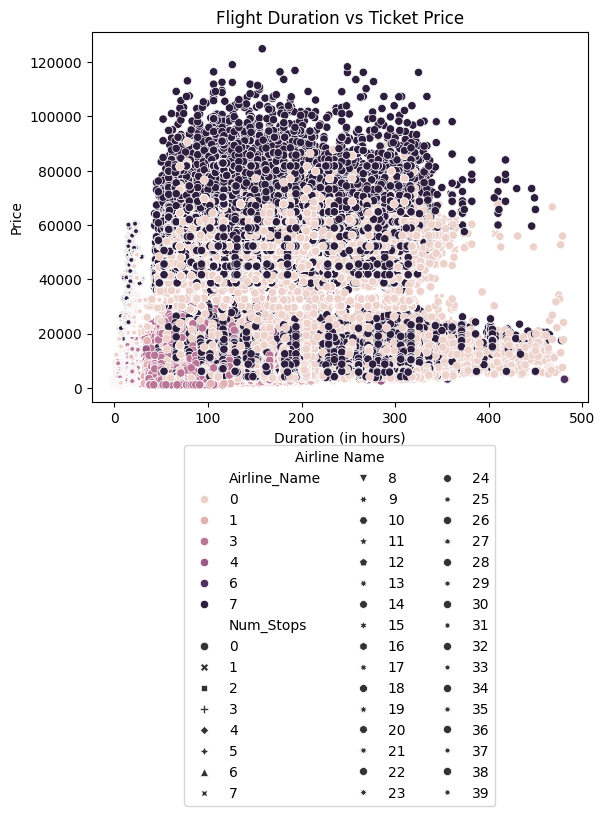

In [68]:
#Scatter plot for flight duration vs price
sns.scatterplot(data=df, x='Flight_Duration', y='Ticket_Price', hue='Airline_Name', style='Num_Stops')
plt.title('Flight Duration vs Ticket Price')
plt.xlabel('Duration (in hours)')
plt.ylabel('Price')

# Adjust legend to horizontal placement
plt.legend(title='Airline Name', loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)  # Adjust ncol for number of columns
plt.show()


2. Line Chart: Departure Time vs. Price

In [69]:
df.columns

Index(['Flight_Date', 'Airline_Name', 'Flight_Number', 'Travel_Class',
       'Origin_City', 'Departure_Time', 'Destination_City', 'Arrival_Time',
       'Flight_Duration', 'Ticket_Price', 'Num_Stops', 'Date_Day',
       'Date_Month', 'Date_Quarter', 'Date_Year', 'time_category',
       'Time_Category', 'Route'],
      dtype='object')

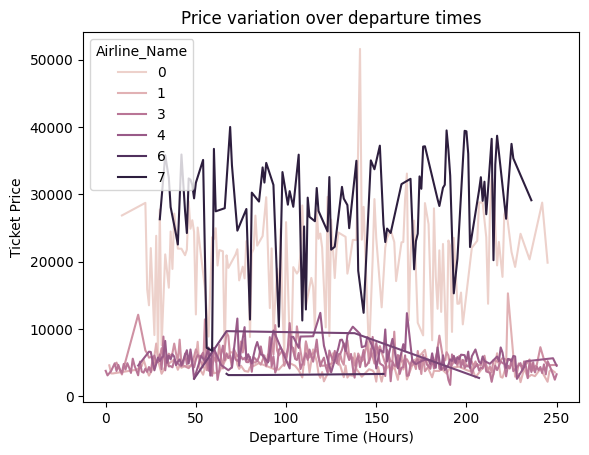

In [70]:
#Convert 'dep_time' to 24-hour numeric format (if not already)
df['Departure_Time_Hour'] = df['Departure_Time'].str.split(':').str[0].astype(int)

#Line chart for departure time vs price
sns.lineplot(data=df, x='Departure_Time_Hour',y='Ticket_Price',hue='Airline_Name',errorbar=None)
plt.title('Price variation over departure times')
plt.xlabel('Departure Time (Hours)')
plt.ylabel('Ticket Price')
plt.show()


3. Combine Duration, Departure Time, and Price in 3D

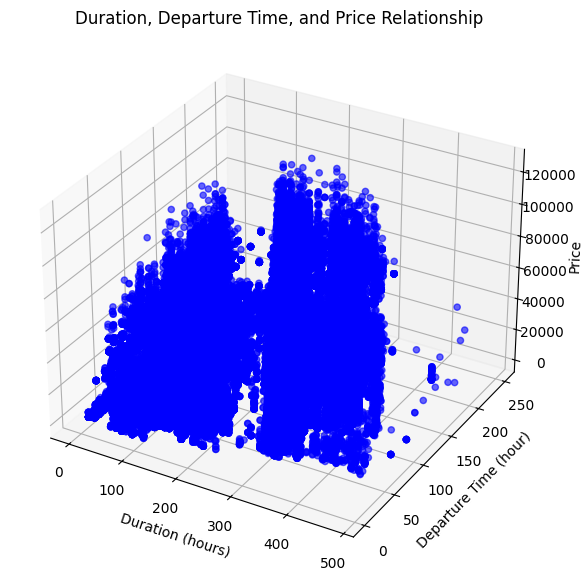

In [72]:
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot for duration, departure time, and price
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Flight_Duration'], df['Departure_Time_Hour'], df['Ticket_Price'], c='blue', alpha=0.6)
ax.set_title('Duration, Departure Time, and Price Relationship')
ax.set_xlabel('Duration (hours)')
ax.set_ylabel('Departure Time (hour)')
ax.set_zlabel('Price')

plt.show()


### Impact of Stops on Price:

1. Bar Chart for Average Price by Number of Stops

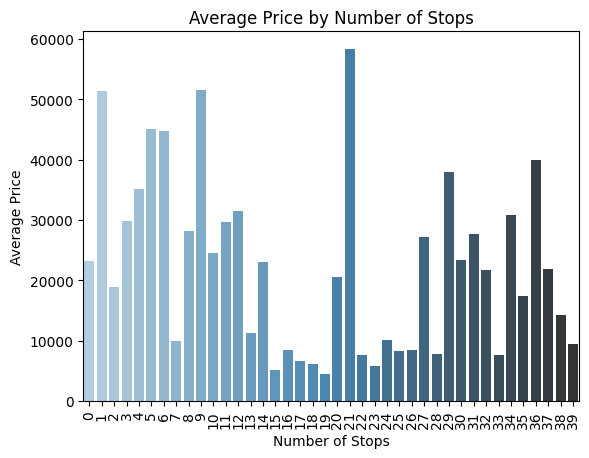

In [73]:
# Bar chart for average price by stops
sns.barplot(data=df, x='Num_Stops', y='Ticket_Price', estimator='mean',hue = 'Num_Stops', errorbar=None, palette='Blues_d',legend=False)
plt.title('Average Price by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


2. Box Plot to Visualize Price Distribution

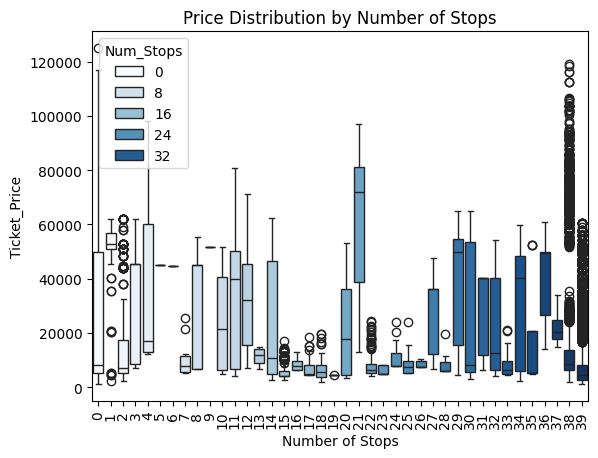

In [75]:
# Box plot for price distribution by stops
sns.boxplot(data=df, x='Num_Stops', y='Ticket_Price',hue='Num_Stops', palette='Blues',dodge=False)
plt.title('Price Distribution by Number of Stops')
plt.xlabel('Number of Stops')
plt.xticks(rotation=90)
plt.ylabel('Ticket_Price')
plt.show()
